<a href="https://colab.research.google.com/github/jpsiegel/Projects/blob/master/Turing_Instability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Instability

Ayudantia exercise from 14:00 to 23:59.

The assistants will help you from 15:30 to 17:00.

You can contact the assistants using zoom conference, alternatively you can mail the assistants at gsvidal@uc.cl and gnyanez@uc.cl

To improve our question or problem understanding try to write a comment with it explaining your ideas, your good redaction and clarity will be appreciated. The ayudantes can see and modify this notebook, but be patients dont work instantly. Before asking you can save to be shure that we will see the same thing.

Turn in your work when you finish.

Good Luck, Have Fun ;)

Note: use the scratch code that is below.

### Activities

Look at the equations in Sayama exercise 14.10. Do the following:

1. Calculate the homogeneous equilibrium of the system and its stability, show the algebra (2 points)
2. Determine if the equilibrium is Turing unstable (2 points)
3. Simulate the equations for different parameters using the forward Euler method (use turing-pattern-PDE.py). (2 points)

Submit the tarea on paper (take a picture), and upload your code for the simulations.

In [0]:
%matplotlib inline
import matplotlib
from pylab import *
import time
from IPython import display

In [0]:
n = 100     # size of grid: n * n
Dh = 1. / n # spatial resolution, assuming space is [0,1] * [0,1]
Dt = 0.01   # temporal resolution

alfa, beta = 2, 6 # parameter values, they still fulfill requirements for turing instability

Du = 0.0001 # diffusion constant of u
Dv = 0.001 # diffusion constant of v

In [0]:
def initialize():
    global u, v, nextu, nextv
    u = zeros([n, n])
    v = zeros([n, n])
    for x in range(n):
        for y in range(n):
          u[x, y] = 4 + uniform(-0.04, 0.04) # starting points and small noise is added
          v[x, y] = 4 + uniform(-0.04, 0.04) # starting points and small noise is addeds

    nextu = zeros([n, n])
    nextv = zeros([n, n])
    
def observe():
    global u, v, nextu, nextv
    subplot(1, 2, 1)
    cla()
    imshow(u, cmap = 'winter')
    plt.colorbar()
    #imshow(u, vmin = 0, vmax = 2, cmap = cm.binary)
    title('u')
    subplot(1, 2, 2)
    cla()
    imshow(v, cmap = 'winter')
    plt.colorbar()
    #imshow(v, vmin = 0, vmax = 2, cmap = cm.binary)
    title('v')
    
def update():
    global u, v, nextu, nextv
    for x in range(n):
        for y in range(n):
            # state-transition function
            uC, uR, uL, uU, uD = u[x,y], u[(x+1)%n,y], u[(x-1)%n,y], \
                                 u[x,(y+1)%n], u[x,(y-1)%n]
            vC, vR, vL, vU, vD = v[x,y], v[(x+1)%n,y], v[(x-1)%n,y], \
                                 v[x,(y+1)%n], v[x,(y-1)%n]
            uLap = (uR + uL + uU + uD - 4 * uC) / (Dh**2)
            vLap = (vR + vL + vU + vD - 4 * vC) / (Dh**2)
            # we replace with equations of the excercise
            nextu[x,y] = uC + (uC*(vC-1) - alfa + Du * uLap) * Dt 
            nextv[x,y] = vC + (beta - uC*vC + Dv * vLap) * Dt

    u, nextu = nextu, u
    v, nextv = nextv, v

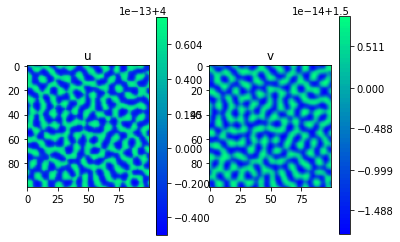

4851


In [0]:
# Simulate and display results
initialize()
for t in range(10000):
    print(t)
    plt.figure()
    
    update()
    observe()

    display.clear_output(wait=True)
    display.display(gcf())
    time.sleep(0.01)
    plt.close()